In [108]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_45236\3966923469.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed
C:\Users\HP\AppData\Local\Temp\ipykernel_45236\3966923469.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['MA'] = subset['Close'].rolling(WINDOW).mean()


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1995-10-13,0.671318,0.719269,0.671318,0.671318,6328631,NaN,NaN,NaN,NaN
1995-10-16,0.679310,0.703285,0.671318,0.703285,993263,NaN,-1.0,0.011905,NaN
1995-10-17,0.671318,0.703285,0.671318,0.671318,276792,NaN,-1.0,0.000000,0.011764
1995-10-18,0.639350,0.671318,0.623366,0.639350,5322839,NaN,-1.0,-0.047620,0.059944
1995-10-19,0.647343,0.655334,0.639351,0.647343,1140202,NaN,-1.0,-0.035714,0.046694
...,...,...,...,...,...,...,...,...,...
2025-12-19,232.009995,236.250000,231.570007,236.250000,1100600,239.749999,-1.0,344.603625,-0.996686
2025-12-22,232.300003,234.000000,231.059998,231.679993,665300,239.366000,-1.0,345.035624,-0.996691
2025-12-23,230.550003,234.309998,229.899994,233.440002,675600,239.057999,-1.0,342.428812,-0.996666


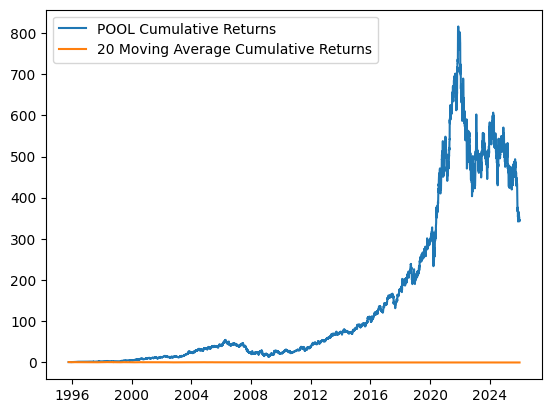

In [ ]:
#Simple moving average strategy

TICKER = 'POOL'
WINDOW = 20

def get_data():
    df = yf.download(TICKER, start="1993-01-01") 
    df.columns = df.columns.get_level_values(0)

    subset = df.iloc[-10000:,:]
    subset['MA'] = subset['Close'].rolling(WINDOW).mean()
    return subset

def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df
   

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) - 1
     
     #plot the returns
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df


def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()





C:\Users\HP\AppData\Local\Temp\ipykernel_45236\593800808.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, start="1993-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,10_ma,27_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
1993-03-10,25.206924,25.206924,25.051752,25.155200,194400,24.813821,24.572822,1.0,0.002056,0.002056
1993-03-11,25.137955,25.293127,25.103472,25.224162,70900,24.881063,24.599642,1.0,-0.000686,-0.000686
1993-03-12,24.879337,24.948303,24.724165,24.931062,643600,24.918993,24.614968,1.0,-0.010967,-0.010967
1993-03-15,25.000011,25.000011,24.862080,24.862080,310800,24.975888,24.625184,1.0,-0.006169,-0.006169
1993-03-16,25.000011,25.068977,25.000011,25.000011,30800,24.996577,24.631569,1.0,-0.006169,-0.006169
...,...,...,...,...,...,...,...,...,...,...
2025-12-19,680.590027,681.090027,676.469971,676.590027,103599500,679.516199,674.492906,1.0,26.055637,-0.458767
2025-12-22,684.830017,685.359985,680.590027,683.940002,69556700,679.837610,674.621180,1.0,26.224190,-0.455396
2025-12-23,687.960022,688.200012,683.869995,683.919983,64840000,680.530853,675.284144,1.0,26.348618,-0.452906


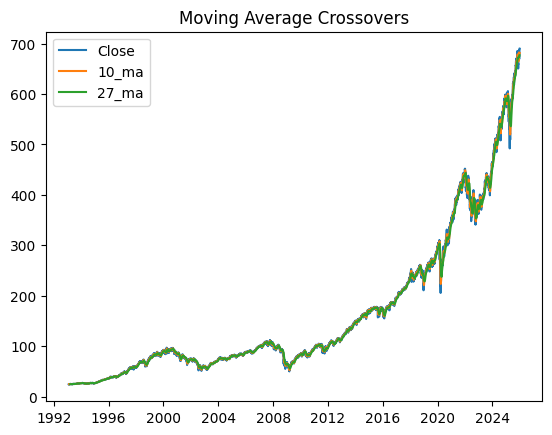

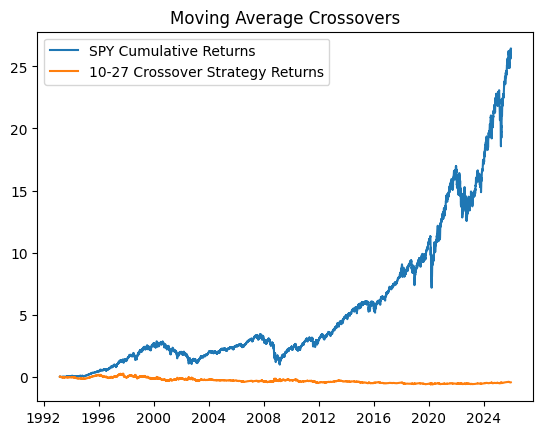

In [112]:
#Moving average crossover Strategy

TICKER = 'SPY'
WINDOW = 20
FAST = 10
SLOW = 27
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER, start="1993-01-01") 
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].rolling(fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].rolling(slow).mean()


    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title('Moving Average Crossovers')
    return df.dropna()

def add_strategy(df, FAST, SLOW):

    # long when fast > slow , short otherwise
    df['Strategy'] = np.where(df[f'{FAST}_ma'] > df[f'{SLOW}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)

    return df
def test_strategy(df, TICKER, FAST, SLOW):
    df['Asset_Returns'] = (1+ df['Close']. pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1+ df['Close']. pct_change() * df['Strategy']).cumprod() - 1
    subset = df.iloc[-LOOKBACK:, :]

    plt.figure()
    plt.plot(subset['Asset_Returns'])
    plt.plot(subset['Strategy_Returns'])
    plt.legend([ f'{TICKER} Cumulative Returns', f'{FAST}-{SLOW} Crossover Strategy Returns'])
    plt.title('Moving Average Crossovers')

    return df.dropna()


df = get_data()
df = add_moving_averages(df,FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df,TICKER, FAST, SLOW)

df


Text(0.5, 1.0, 'Moving Average Crossovers')

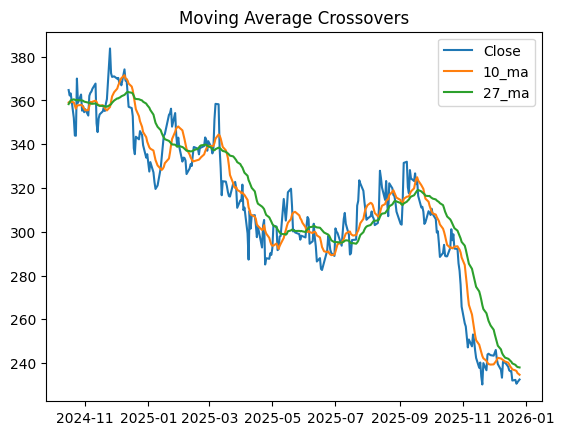

In [ ]:
#There are two parts of iloc - rows, columns - separated by a comma
subsection = df.iloc[-300:,:]



In [ ]:
def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df
   

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) - 1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy'].shift()) - 1
     
     #plot the returns
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df


def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()



